In [208]:
#p1v1
import numpy as np
import matplotlib.pyplot as plt

def circGauss(N,mu,var):
    D=np.size(mu)
    mu=np.reshape(mu,(D,1),order='C')
    E=np.sqrt(var)*np.random.randn(D,N)+mu
    return E

N=10 #number of data points
D=2 #number of dimensions
K=2 #number of clusters
E1=circGauss(N//2,[0,0],3)
E2=circGauss(N//2,[5,5],3)
E=np.hstack((E1,E2))

mu_index=np.random.randint(N,size=K)
mu_old=E[:,mu_index]
d=np.zeros((K,N))

#distances (d) d has K rows (one for each cluster) and N columns (one for each datapoint)
for i in np.arange(K):
    d[i,:]=np.sqrt(np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0))

#using boolean operators to determine r from d
r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1

#updating mu for the first time
mu_new=np.zeros((K,D))
for i in np.arange(K):
    num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
    den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
    mu_new[i,:]=np.squeeze(num/den)

mu_new=mu_new.T

print(mu_old)

j=1
while not np.allclose(mu_old,mu_new) and j<10000:
    mu_old=mu_new.copy()
    
    for i in np.arange(K):
        d[i,:]=np.sqrt(np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0))
    
    r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1
    
    for i in np.arange(K):
        num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
        den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
        mu_new[i,:]=np.squeeze(num/den)
    mu_new=mu_new.T
    j+=1
        

print(mu_old)
print(mu_new)
print(j)

[[ 6.09596332 -0.96873071]
 [ 6.36461578 -0.01837091]]
[[ 5.62893457  5.14276005]
 [-0.12639257  0.07262759]]
[[ 5.62893457 -0.12639257]
 [ 5.14276005  0.07262759]]
100000


In [16]:
#p1v2
import numpy as np
import matplotlib.pyplot as plt

def circGauss(N,mu,var):
    D=np.size(mu)
    mu=np.reshape(mu,(D,1),order='C')
    E=np.sqrt(var)*np.random.randn(D,N)+mu
    return E

N=30 #number of data points
D=2 #number of dimensions
K=2 #number of clusters
E1=circGauss(N//2,[0,0],3)
E2=circGauss(N//2,[5,5],3)
E=np.hstack((E1,E2))

mu_index=np.random.randint(N,size=K)
mu_old=E[:,mu_index]
d=np.zeros((K,N))

print(mu_old)

j=1
while j<10000:
    #distances (d) d has K rows (one for each cluster) and N columns (one for each datapoint)
    for i in np.arange(K):
        d[i,:]=np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

    #using boolean operators to determine r from d
    r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1

    #updating mu for the first time
    mu_new=np.zeros((K,D))
    for i in np.arange(K):
        num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
        den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
        mu_new[i,:]=np.squeeze(num/den)

    mu_new=mu_new.T
    
    if np.allclose(mu_old,mu_new):
        break
    mu_old=mu_new.copy()
    j+=1
    
J=np.zeros((K,N))    
for i in np.arange(K):
    J[i,:]=np.sum((np.tile(np.reshape(mu_new[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

J=np.sum(J*r)

print(mu_new)
print(j)
print(J)

[[ 6.79023392 -1.80824166]
 [ 6.39397725  3.30730062]]
[[ 5.6305313  -0.50965231]
 [ 4.32660285  0.34614141]]
2
135.87107796472176


In [25]:
#p1v3
import numpy as np
import matplotlib.pyplot as plt

def circGauss(N,mu,var):
    D=np.size(mu)
    mu=np.reshape(mu,(D,1),order='C')
    E=np.sqrt(var)*np.random.randn(D,N)+mu
    return E

def Batch_K_Means(E,K):
    D=np.shape(E)
    N=D[1]
    D=D[0]
    j=1
    
    mu_index=np.random.randint(N,size=K)
    mu_old=E[:,mu_index]
    d=np.zeros((K,N))
    
    while j<10000:
        #distances (d) d has K rows (one for each cluster) and N columns (one for each datapoint)
        for i in np.arange(K):
            d[i,:]=np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

        #using boolean operators to determine r from d
        r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1

        #updating mu for the first time
        mu_new=np.zeros((K,D))
        for i in np.arange(K):
            num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
            den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
            mu_new[i,:]=np.squeeze(num/den)

        mu_new=mu_new.T
    
        if np.allclose(mu_old,mu_new):
            break
        mu_old=mu_new.copy()
        j+=1
    
    J=np.zeros((K,N))    
    for i in np.arange(K):
        J[i,:]=np.sum((np.tile(np.reshape(mu_new[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

    J=np.sum(J*r)
    return mu_new, J, j

N=30 #number of data points
D=2 #number of dimensions
K=2 #number of clusters
E1=circGauss(N//2,[0,0],3)
E2=circGauss(N//2,[5,5],3)
E=np.hstack((E1,E2))

Result=Batch_K_Means(E,K)
mu=Result[0]
J=Result[1]

print(mu)
print(J)

[[ 0.42540252  5.46473366]
 [-0.11494511  5.01473476]]
189.12282205919996


(20, 491)


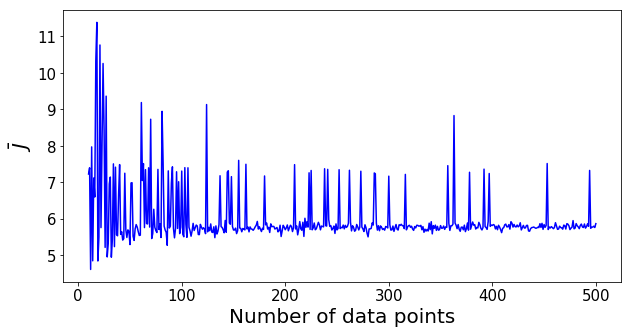

In [5]:
#p1v4
import numpy as np
import matplotlib.pyplot as plt

def circGauss(N,mu,var):
    D=np.size(mu)
    mu=np.reshape(mu,(D,1),order='C')
    E=np.sqrt(var)*np.random.randn(D,N)+mu
    return E

def Batch_K_Means(E,K):
    D=np.shape(E)
    N=D[1]
    D=D[0]
    j=1
    
    mu_index=np.random.randint(N,size=K)
    mu_old=E[:,mu_index]
    d=np.zeros((K,N))
    
    while j<10000:#max iterations
        #distances (d) d has K rows (one for each cluster) and N columns (one for each datapoint)
        for i in np.arange(K):
            d[i,:]=np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

        #using boolean operators to determine r from d
        r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1

        #updating mu 
        mu_new=np.zeros((K,D))
        for i in np.arange(K):
            num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
            den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
            mu_new[i,:]=np.squeeze(num/den)
        mu_new=mu_new.T
    
        if np.allclose(mu_old,mu_new):
            break
        mu_old=mu_new.copy()
        j+=1
    
    J=np.zeros((K,N))    
    for i in np.arange(K):
        J[i,:]=np.sum((np.tile(np.reshape(mu_new[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

    J=np.sum(J*r)/N
    return mu_new, J, j

D=2 #number of dimensions

#a)
K=2 #number of clusters
n=20 #number of iteration per each number of data point

J=np.zeros((n,491))#matrix of 491 different number of datapoints and n iteration per each
for N in np.arange(10,501):#number of data points
    for i in np.arange(n):
        E1=circGauss(N//2,[0,0],3)
        E2=circGauss(N//2,[5,5],3)
        E=np.hstack((E1,E2))
        Result=Batch_K_Means(E,K)
        J[i,N-10]=Result[1]



print(np.shape(J))
J=np.mean(J,axis=0)

fig=plt.figure(figsize=[10,5])
plt.plot(np.arange(10,501),J,c="b")
plt.xlabel('Number of data points',fontsize=20)
plt.ylabel(r'$\bar{J}$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()





In [3]:
#p1v4
#b)
N=500 #number of data points
D=2 #number of dimensions
K=2 #number of clusters
E1=circGauss(N//2,[0,0],3)
E2=circGauss(N//2,[5,5],3)
E=np.hstack((E1,E2))

mu_index=np.random.randint(N,size=K)
mu_old=E[:,mu_index]
mu_old[:,0]=[15,15]
print(mu_old)
d=np.zeros((K,N))

j=1
while j<50000:
    #distances (d) d has K rows (one for each cluster) and N columns (one for each datapoint)
    for i in np.arange(K):
        d[i,:]=np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

    #using boolean operators to determine r from d
    r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1

    #updating mu for the first time
    mu_new=np.zeros((K,D))
    for i in np.arange(K):
        num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
        den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
        mu_new[i,:]=np.squeeze(num/den)

    mu_new=mu_new.T
    
    if np.allclose(mu_old,mu_new):
        break
    mu_old=mu_new.copy()
    j+=1
    
J=np.zeros((K,N))    
for i in np.arange(K):
    J[i,:]=np.sum((np.tile(np.reshape(mu_new[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

J=np.sum(J*r)/N

print(mu_new)
print(j)
print(J)

[[15.          6.23652539]
 [15.          5.22673002]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[[nan nan]
 [nan nan]]
50000
nan


In [117]:
#p1v4
#c)
K=2 #number of clusters
n=1000 #number of iteration per each number of data point
N=50 #number of data points

it=np.zeros((n,1))
for i in np.arange(n):
        E1=circGauss(N//2,[0,0],3)
        E2=circGauss(N//2,[5,5],3)
        E=np.hstack((E1,E2))
        Result=Batch_K_Means(E,K)
        it[i,0]=Result[2]
print('maximum number of iterations=')
print(np.amax(it))
print('minimum number of iterations=')
print(np.amin(it))
print('average number of iterations=')
print(np.mean(it))


maximum number of iterations=
8.0
minimum number of iterations=
2.0
average number of iterations=
3.678


(20, 19)


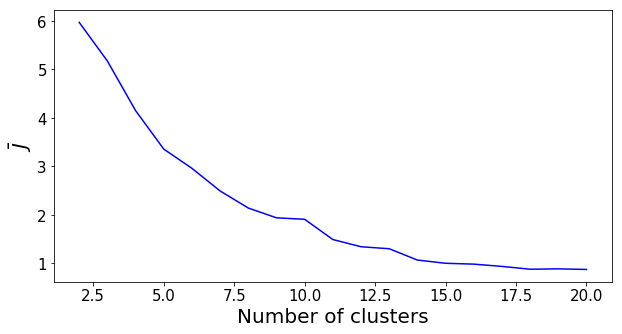

In [12]:
#p1v4
#d)
N=50 #number of datapoints
n=20 #number of iteration per each number of data point

E1=circGauss(N//2,[0,0],3)
E2=circGauss(N//2,[5,5],3)
E=np.hstack((E1,E2))
J=np.zeros((n,19))#matrix of 491 different number of datapoints and n iteration per each
for K in np.arange(2,21):#number of data points
    for i in np.arange(n):
        Result=Batch_K_Means(E,K)
        J[i,K-2]=Result[1]



print(np.shape(J))
J=np.mean(J,axis=0)

fig=plt.figure(figsize=[10,5])
plt.plot(np.arange(2,21),J,c="b")
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel(r'$\bar{J}$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


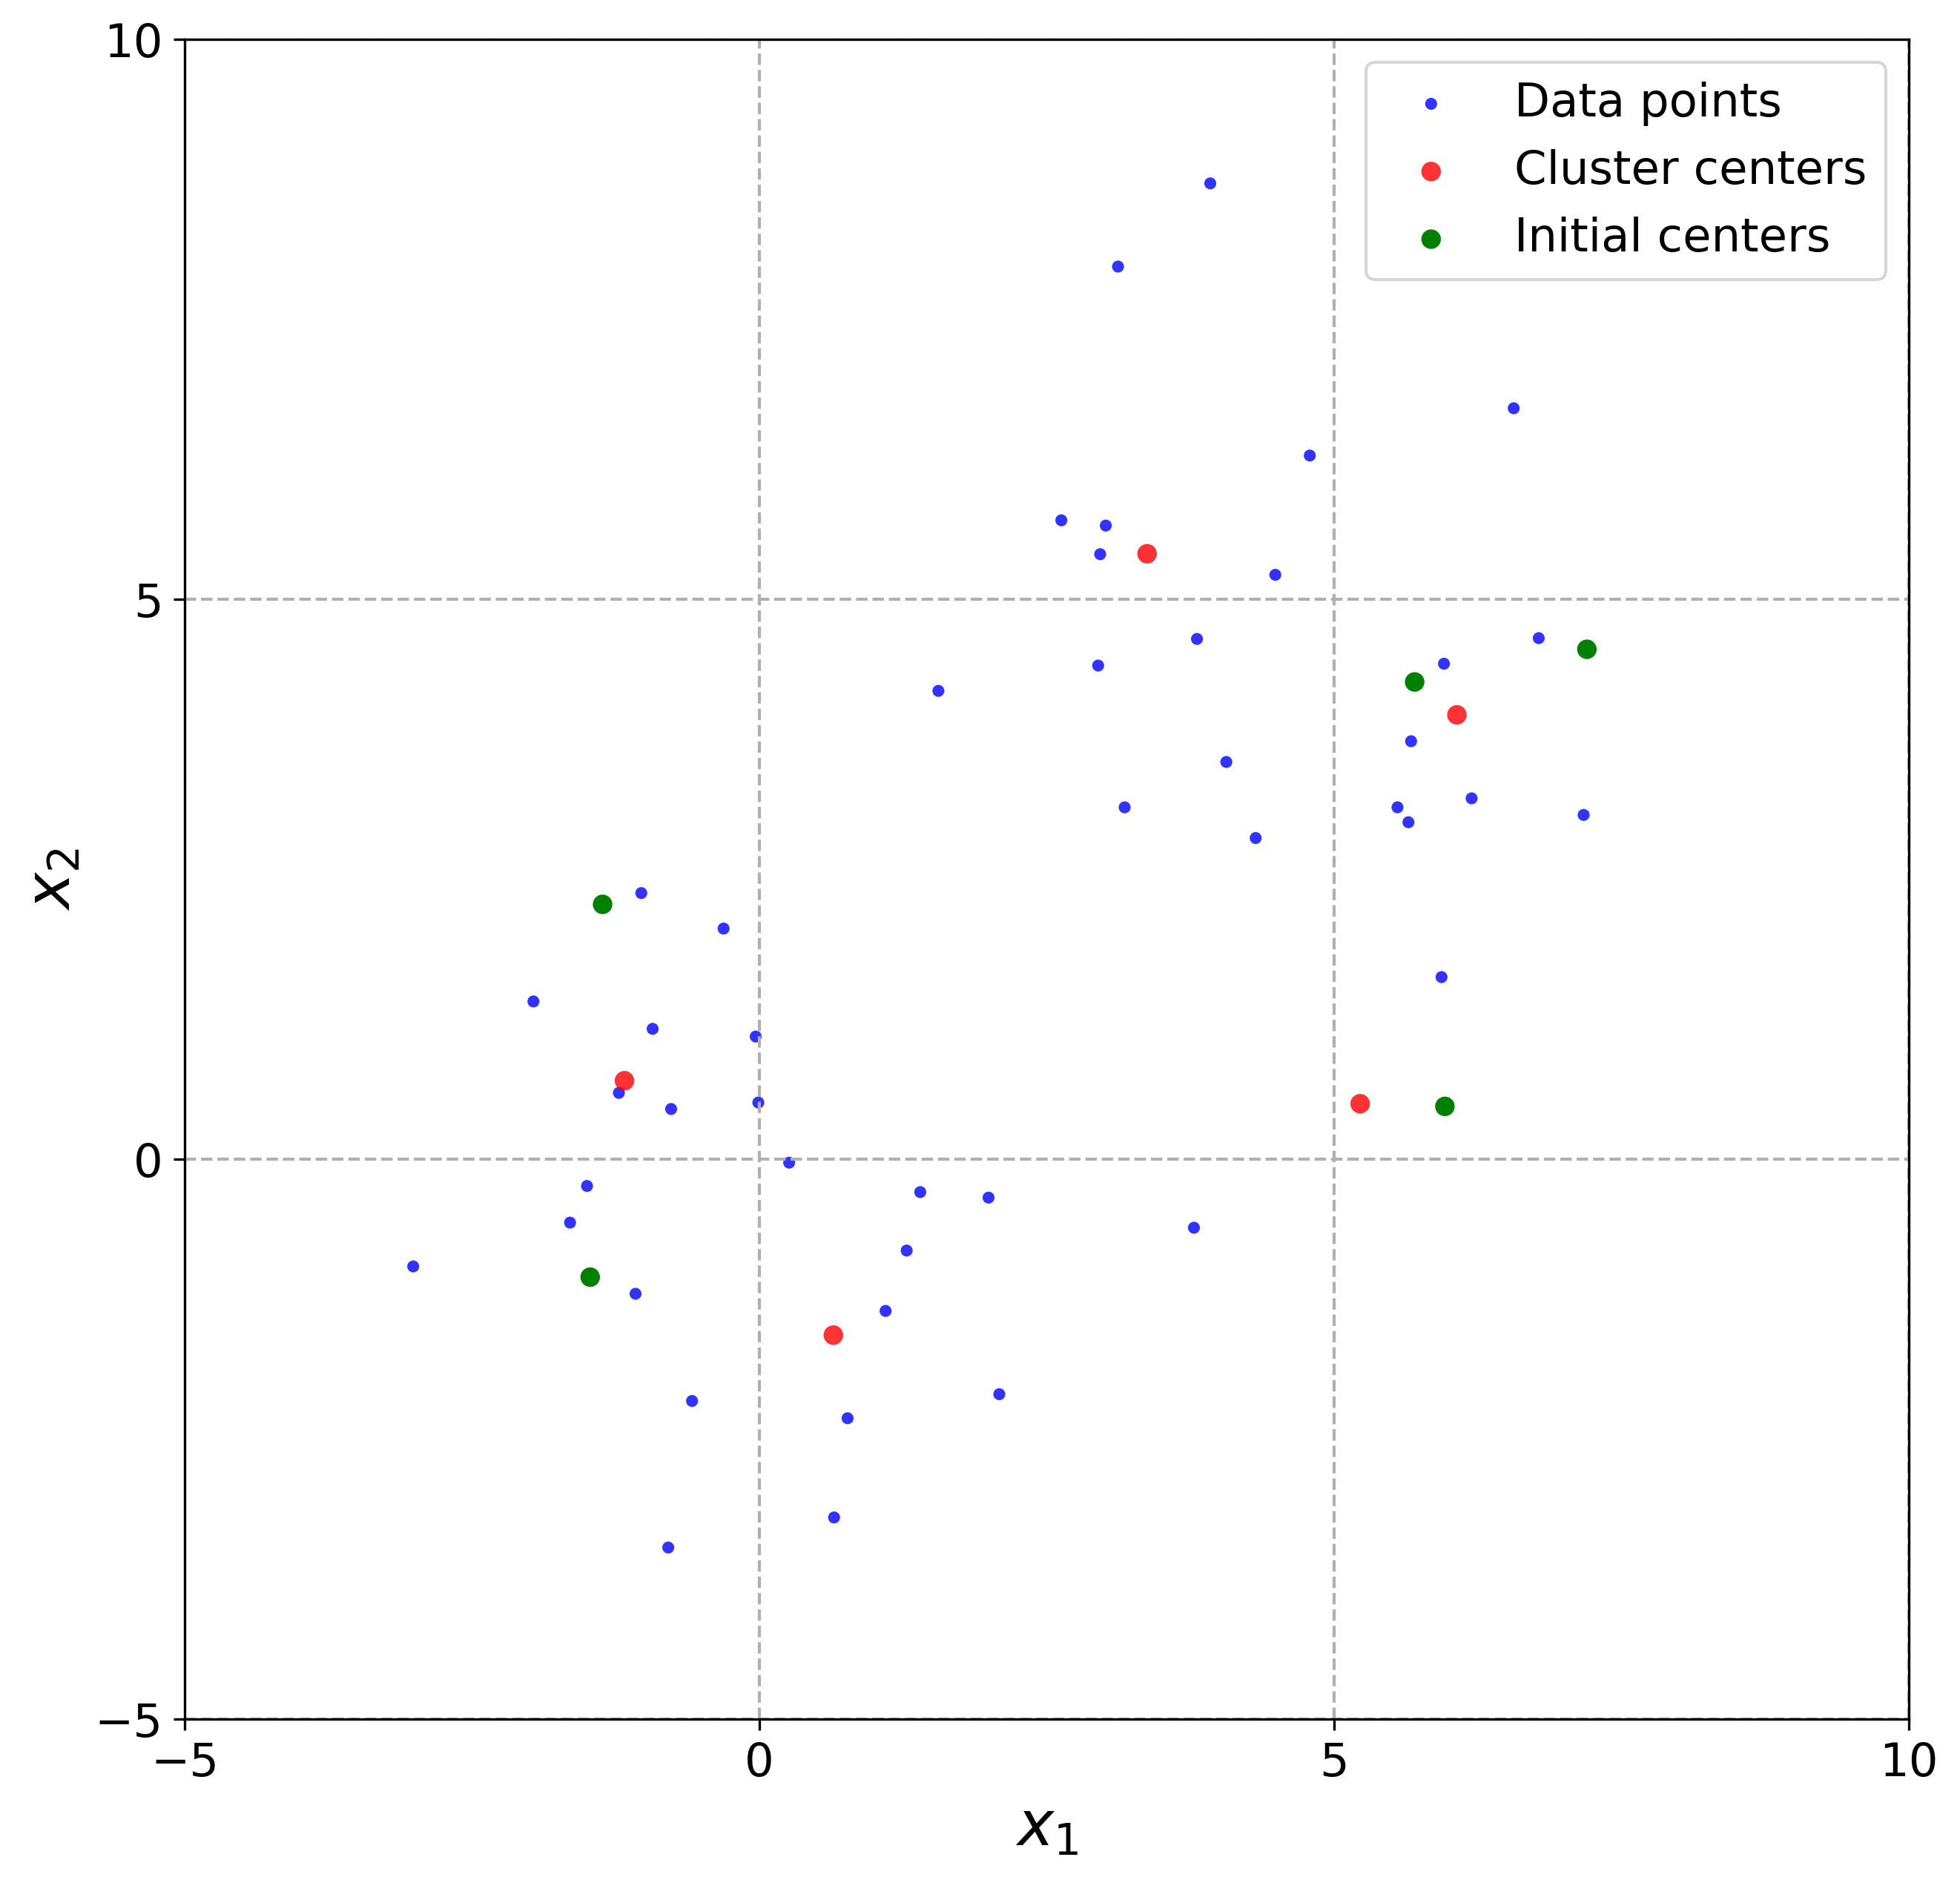

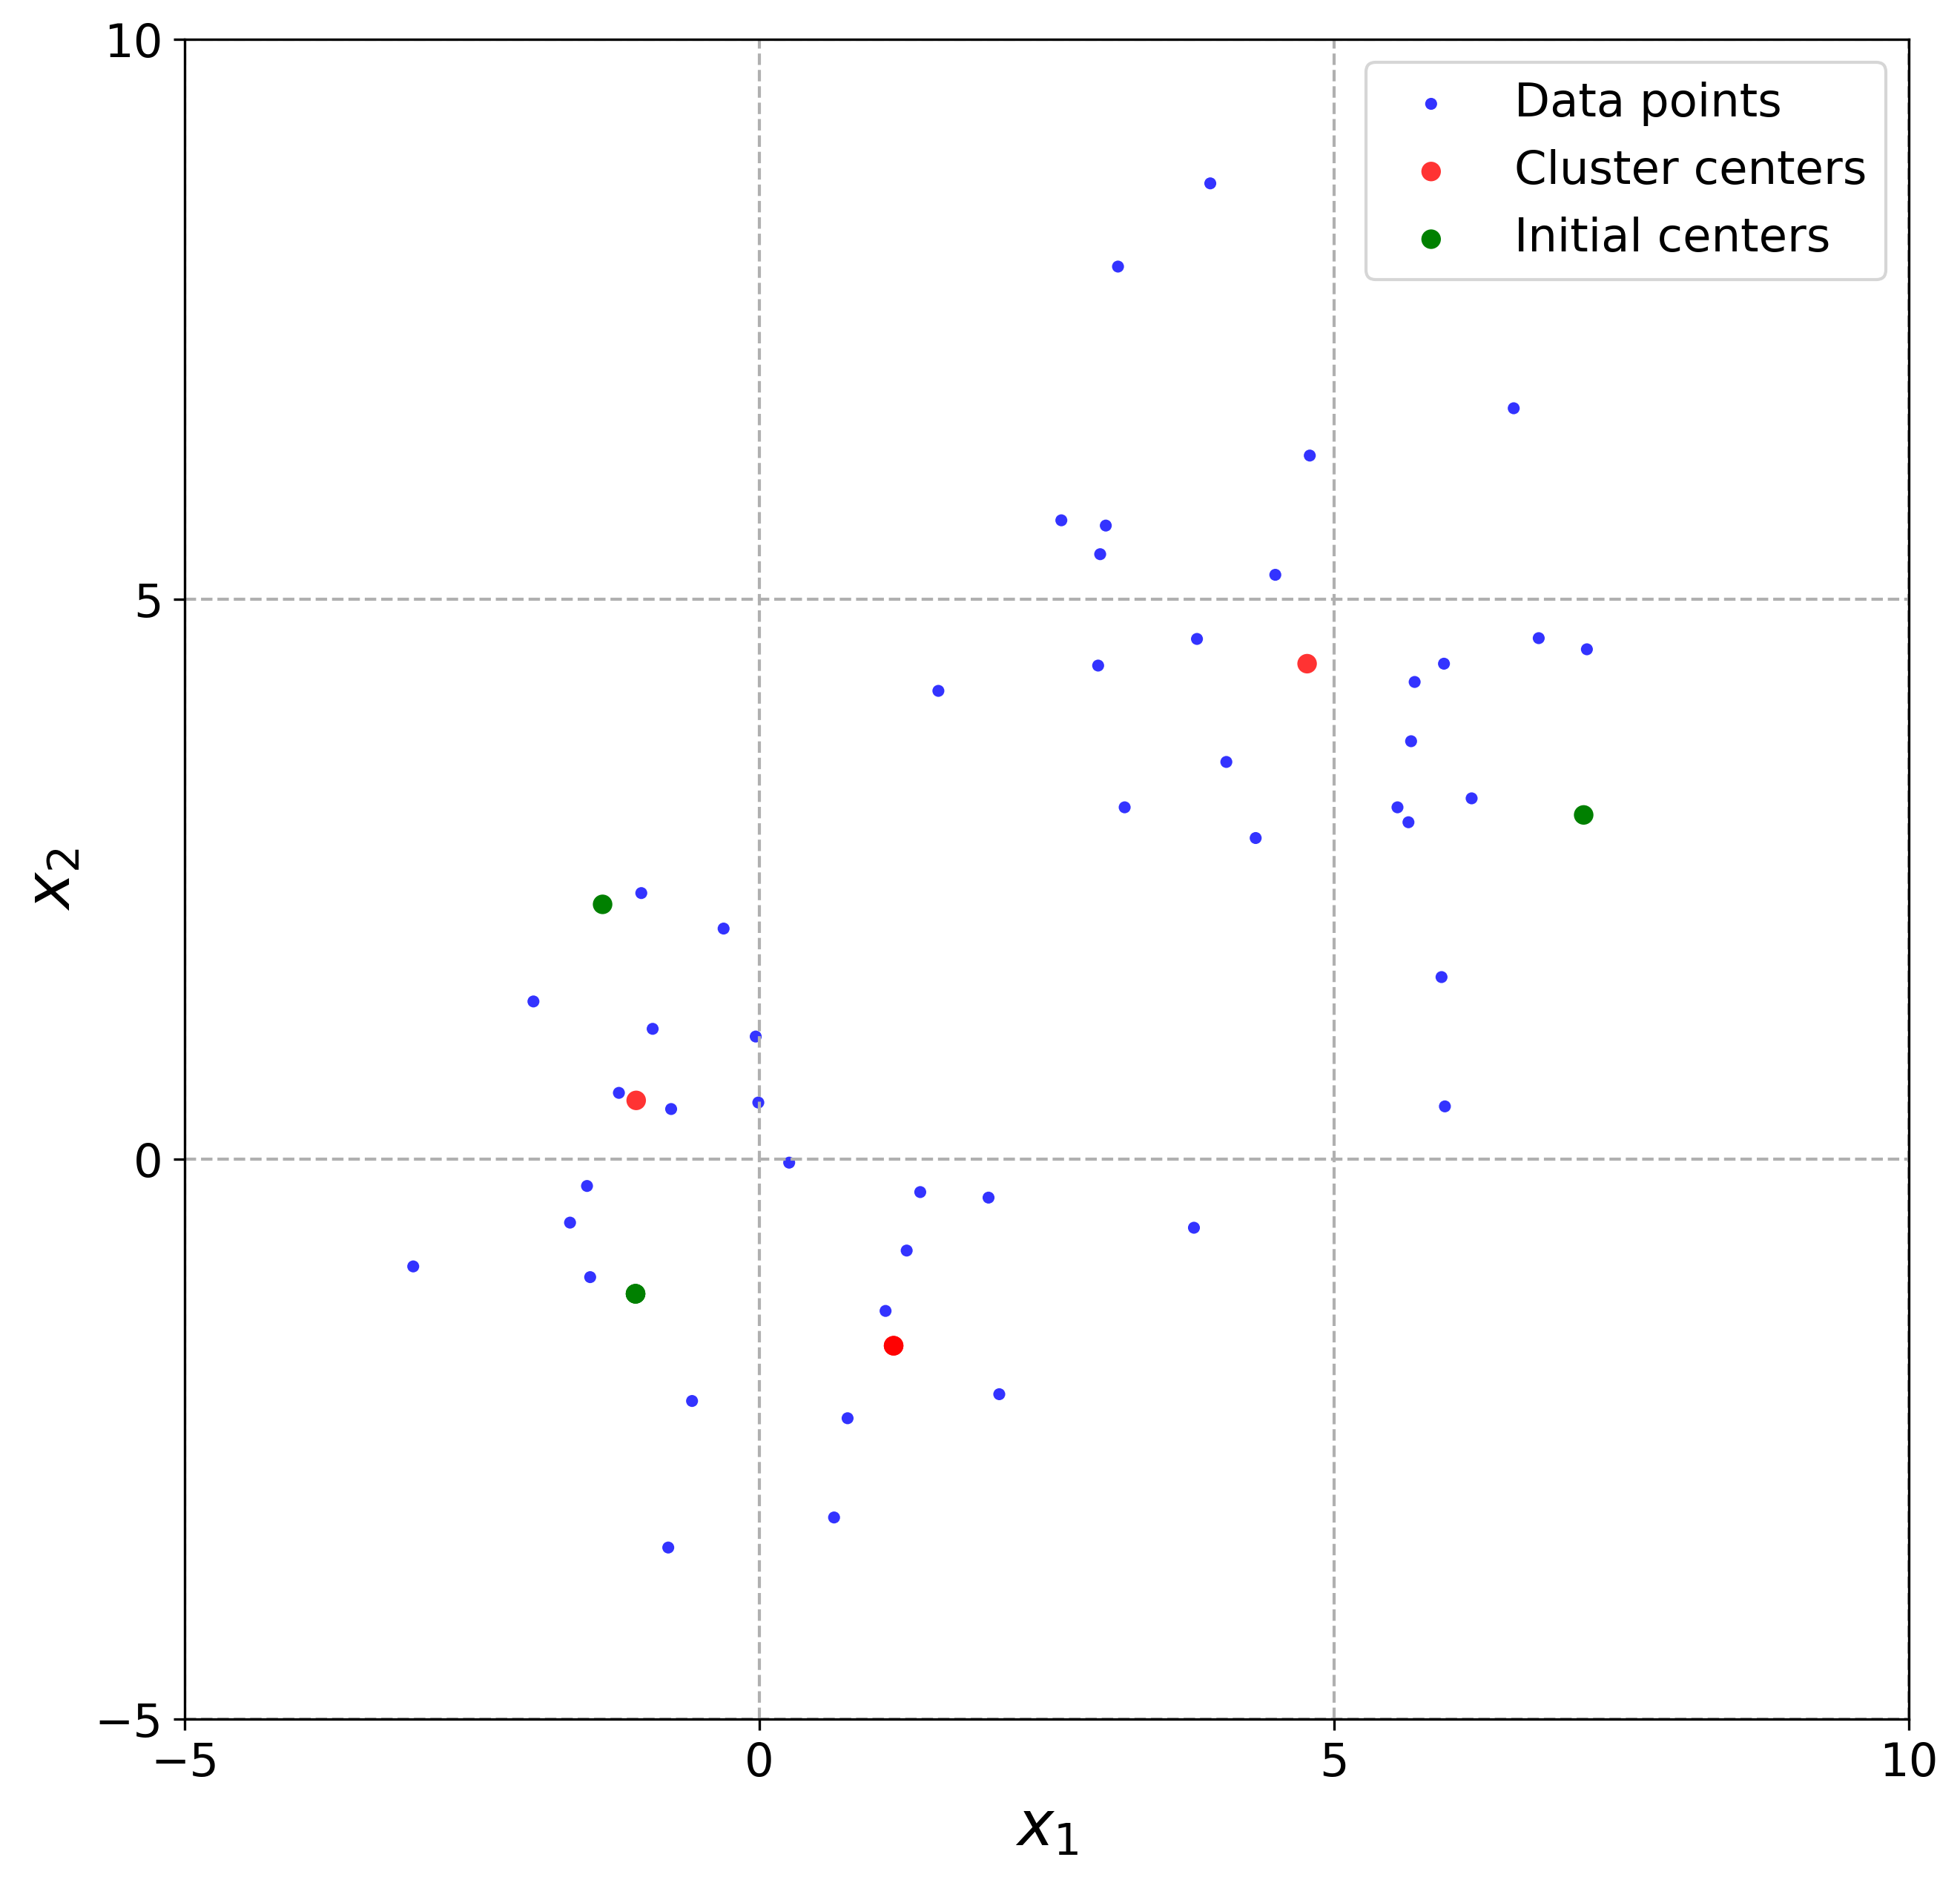

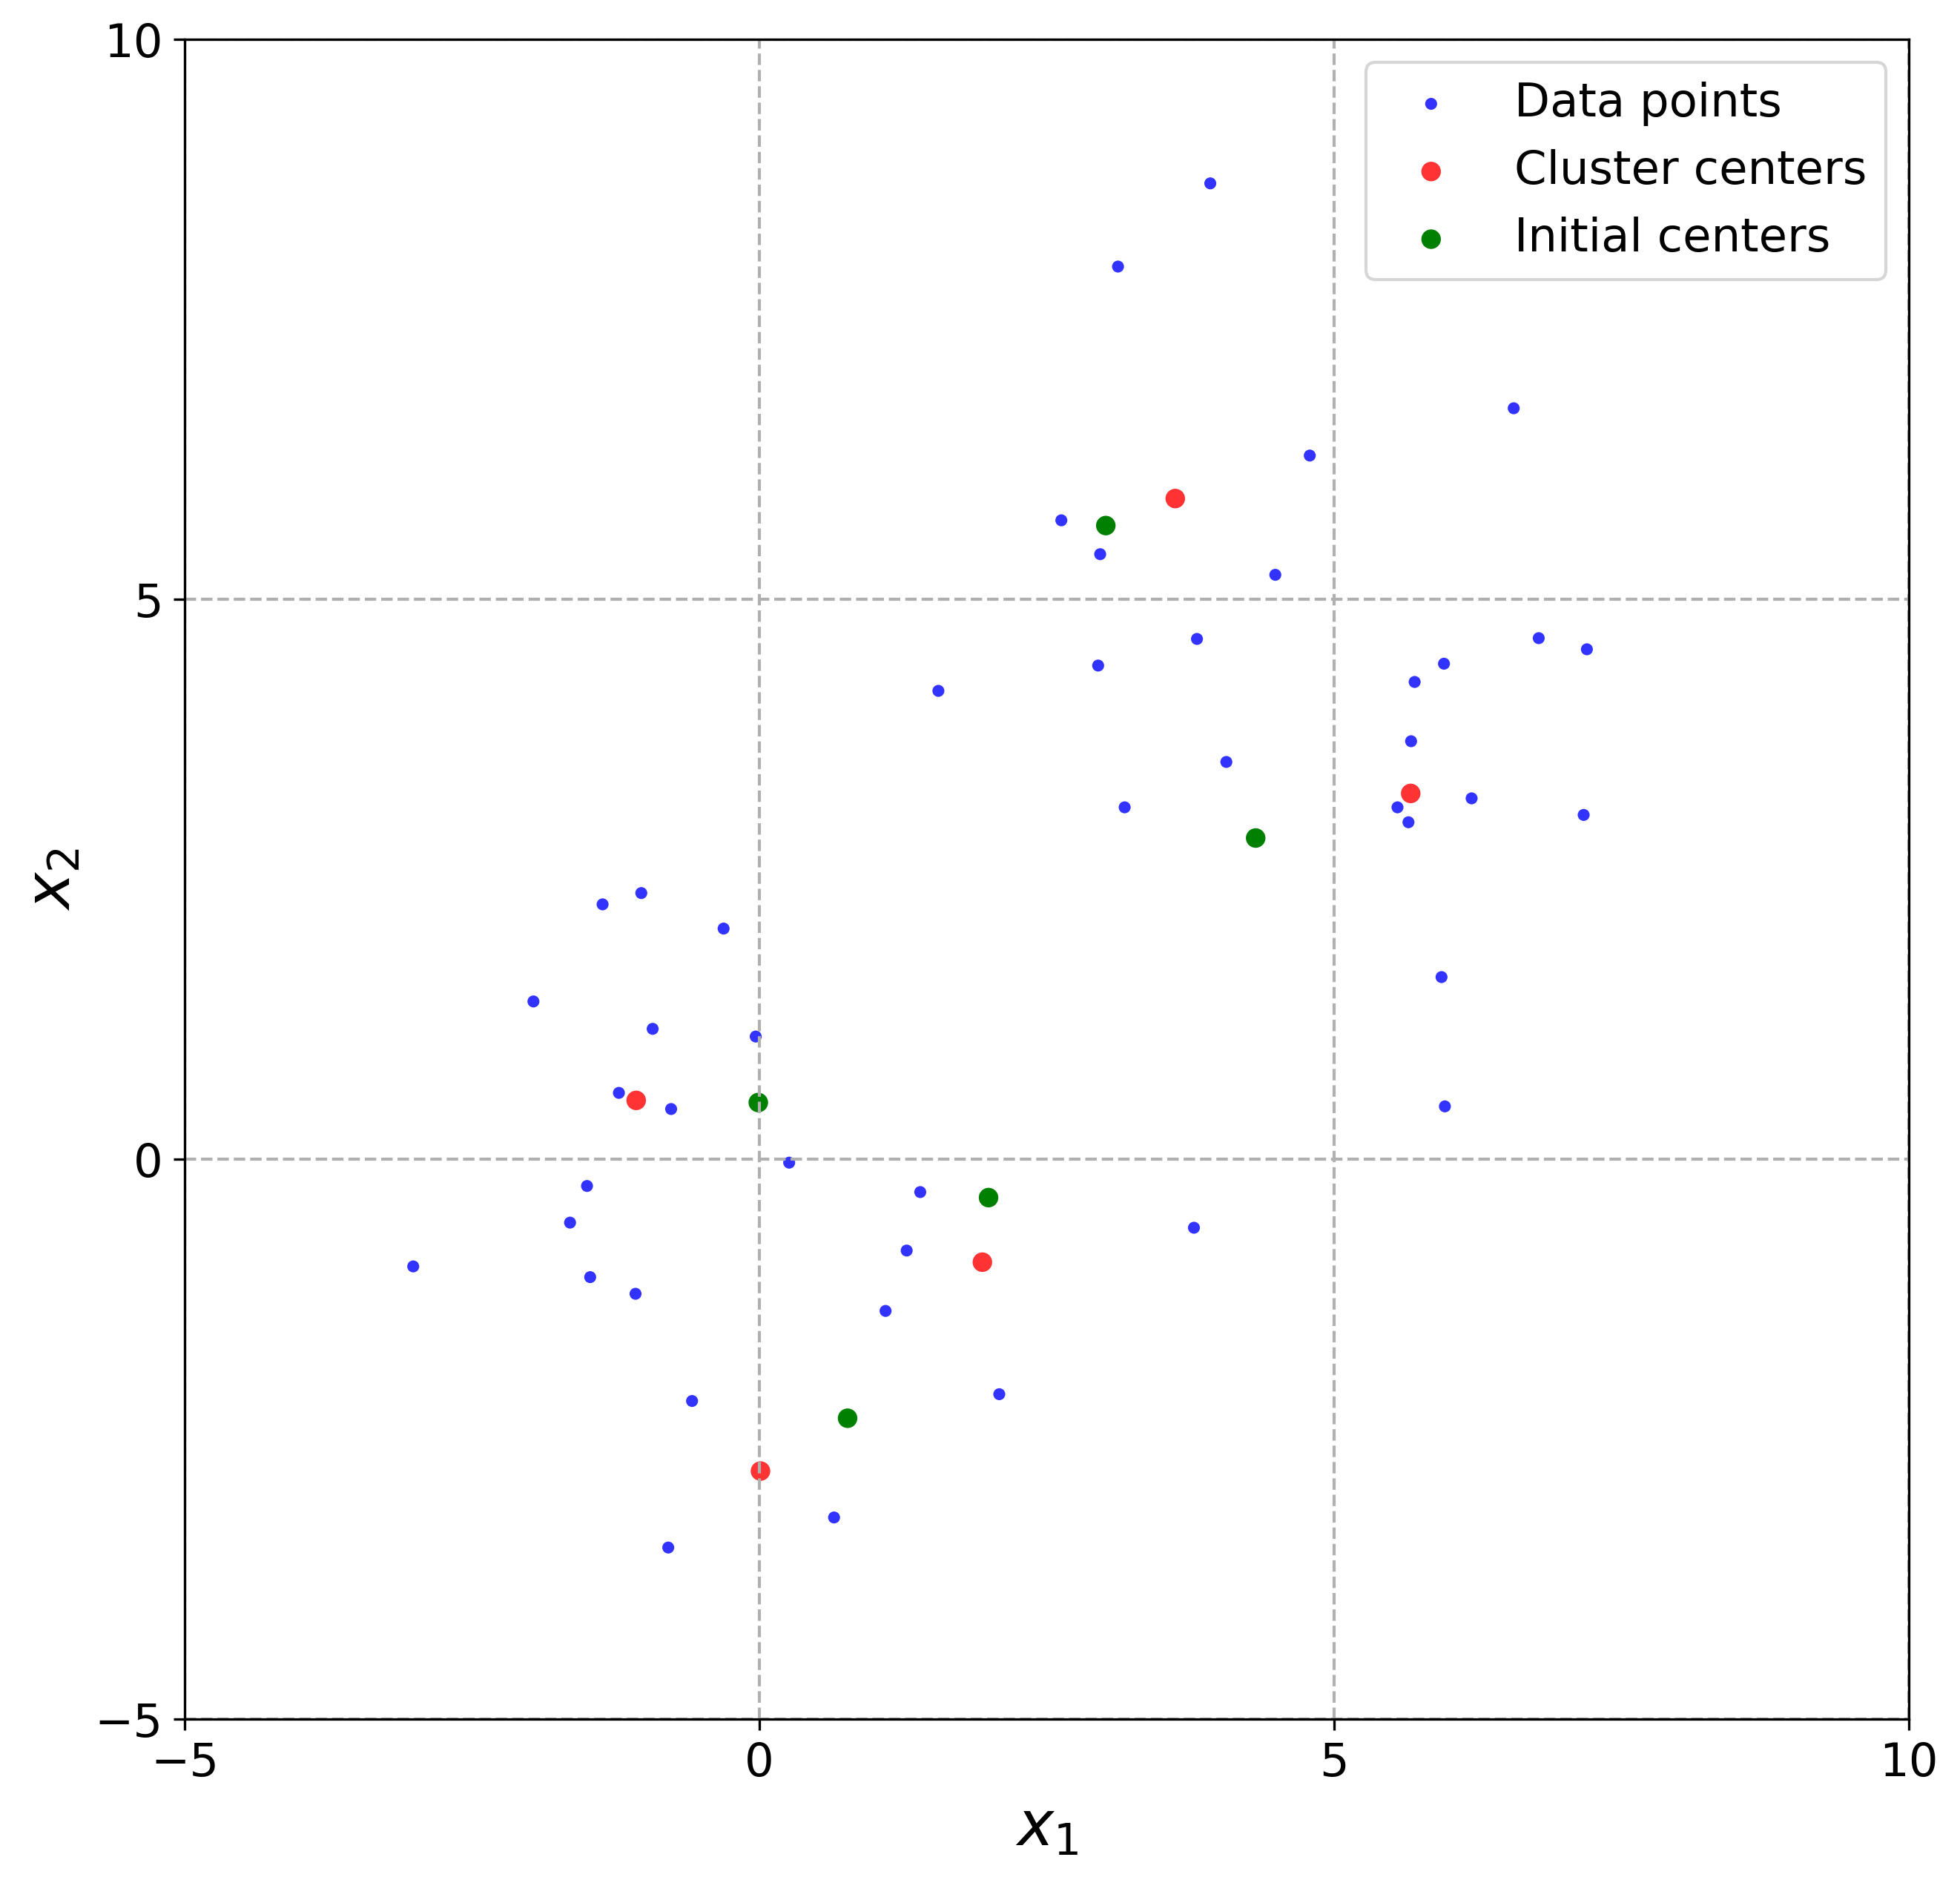

In [20]:
#p1v4
#e)
N=50 #number of data points
D=2 #number of dimensions
K=5 #number of clusters
E1=circGauss(N//2,[0,0],3)
E2=circGauss(N//2,[5,5],3)
E=np.hstack((E1,E2))

for i in np.arange(3):
    mu_index=np.random.randint(N,size=K)
    mu_old=E[:,mu_index]
    d=np.zeros((K,N))
    mup=mu_old.copy()

    j=1
    while j<50000:
        #distances (d) d has K rows (one for each cluster) and N columns (one for each datapoint)
        for i in np.arange(K):
            d[i,:]=np.sum((np.tile(np.reshape(mu_old[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

        #using boolean operators to determine r from d
        r=np.equal(d,np.tile(np.amin(d,axis=0),(K,1)))*1

        #updating mu for the first time
        mu_new=np.zeros((K,D))
        for i in np.arange(K):
            num=np.sum(np.tile(r[i,:],(D,1))*E,axis=1)
            den=np.sum(np.tile(r[i,:],(D,1)),axis=1)
            mu_new[i,:]=np.squeeze(num/den)

        mu_new=mu_new.T

        if np.allclose(mu_old,mu_new):
            break
        mu_old=mu_new.copy()
        j+=1

    J=np.zeros((K,N))    
    for i in np.arange(K):
        J[i,:]=np.sum((np.tile(np.reshape(mu_new[:,i],(D,1),order='C'),(1,N))-E)**2,axis=0)

    J=np.sum(J*r)/N

    fig=plt.figure(figsize=[10,10],dpi=300)
    plt.scatter(E[0,:], E[1,:], alpha=0.8, c='blue', edgecolors='none', s=15,label='Data points')
    plt.scatter(mu_new[0,:], mu_new[1,:], alpha=0.8, c='red', edgecolors='none', s=40,label='Cluster centers')
    plt.scatter(mup[0,:], mup[1,:], c='green', edgecolors='none', s=40,label='Initial centers')
    plt.axis([-5,10,-5,10])
    plt.grid('True',linestyle='--', linewidth=1)
    plt.xlabel('$x_1$',fontsize=20)
    plt.ylabel('$x_2$',fontsize=20)
    plt.xticks([-5,0,5,10],fontsize=15)
    plt.yticks([-5,0,5,10],fontsize=15)
    plt.legend(fontsize=15)
    plt.show()


In [16]:
print(np.shape(mu_new))

(2, 5)
